In [ ]:
import pickle
import os

# path to WESAD dataset
data_path = "./classical-modeling/wesad_pickles"

# list all files in the dataset
wesad_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith(".pkl")]
print(wesad_files)

# list all files in the dataset
wesad_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith(".pkl")]

# load one sample file (e.g., S2.pkl) to inspect its structure
sample_file = wesad_files[0]

# load data
with open(sample_file, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# display data keys and structure
print("Keys in the dataset:", data.keys())

['/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S11.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S4.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S5.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S10.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S7.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S6.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S13.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S17.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S2.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S3.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S16.pkl', '/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles/S14.pkl', '/Users/kiciazeng/Des

In [ ]:
import numpy as np 

# check signal structure
print("Signal Data Keys:", data['signal'].keys())

# check the shape of each signal type
for key in data['signal']:
    print(f"{key}: {np.array(data['signal'][key]).shape}")

# check unique labels
print("Unique Labels:", np.unique(data['label']))

# check chest and wrist signal sub-keys
print("Chest Data Keys:", data['signal']['chest'].keys())
print("Wrist Data Keys:", data['signal']['wrist'].keys())

# check shape of chest and wrist data
for key in data['signal']['chest']:
    print(f"Chest - {key}: {np.array(data['signal']['chest'][key]).shape}")

for key in data['signal']['wrist']:
    print(f"Wrist - {key}: {np.array(data['signal']['wrist'][key]).shape}")

Signal Data Keys: dict_keys(['chest', 'wrist'])
chest: ()
wrist: ()
Unique Labels: [0 1 2 3 4 5 6 7]
Chest Data Keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
Wrist Data Keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])
Chest - ACC: (3663100, 3)
Chest - ECG: (3663100, 1)
Chest - EMG: (3663100, 1)
Chest - EDA: (3663100, 1)
Chest - Temp: (3663100, 1)
Chest - Resp: (3663100, 1)
Wrist - ACC: (167456, 3)
Wrist - BVP: (334912, 1)
Wrist - EDA: (20932, 1)
Wrist - TEMP: (20932, 1)


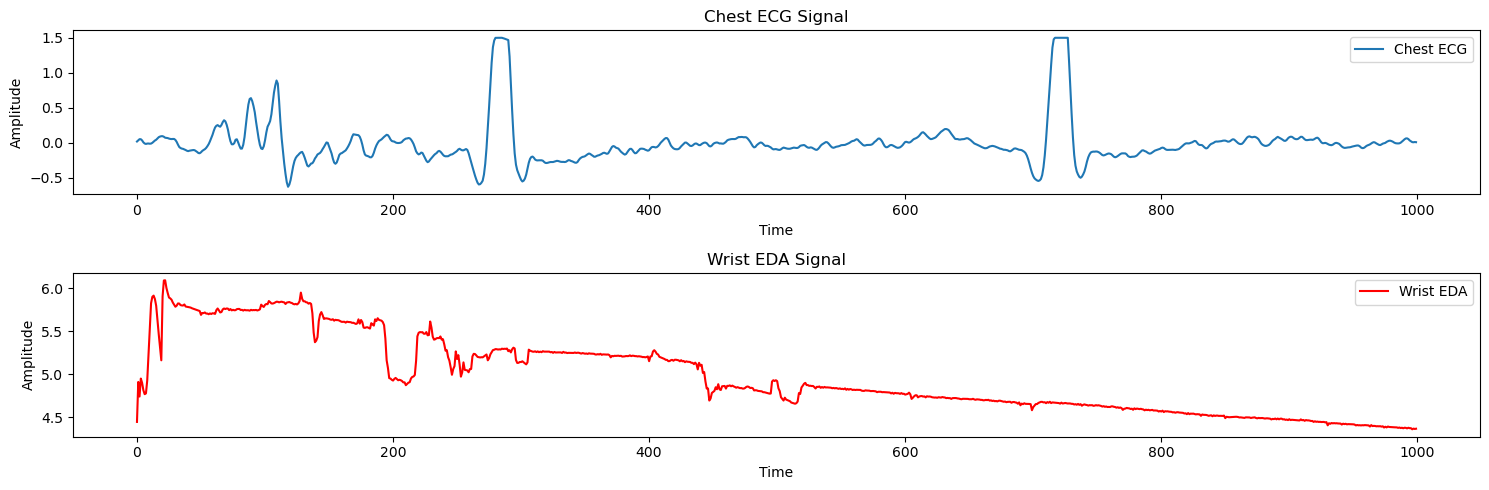

In [10]:
import matplotlib.pyplot as plt 

# Sample the first 1000 points for visualization (too much data otherwise)
sample_size = 1000

plt.figure(figsize=(15, 5))

# Plot Chest ECG
plt.subplot(2, 1, 1)
plt.plot(data['signal']['chest']['ECG'][:sample_size], label="Chest ECG")
plt.title("Chest ECG Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Plot Wrist EDA
plt.subplot(2, 1, 2)
plt.plot(data['signal']['wrist']['EDA'][:sample_size], label="Wrist EDA", color="red")
plt.title("Wrist EDA Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

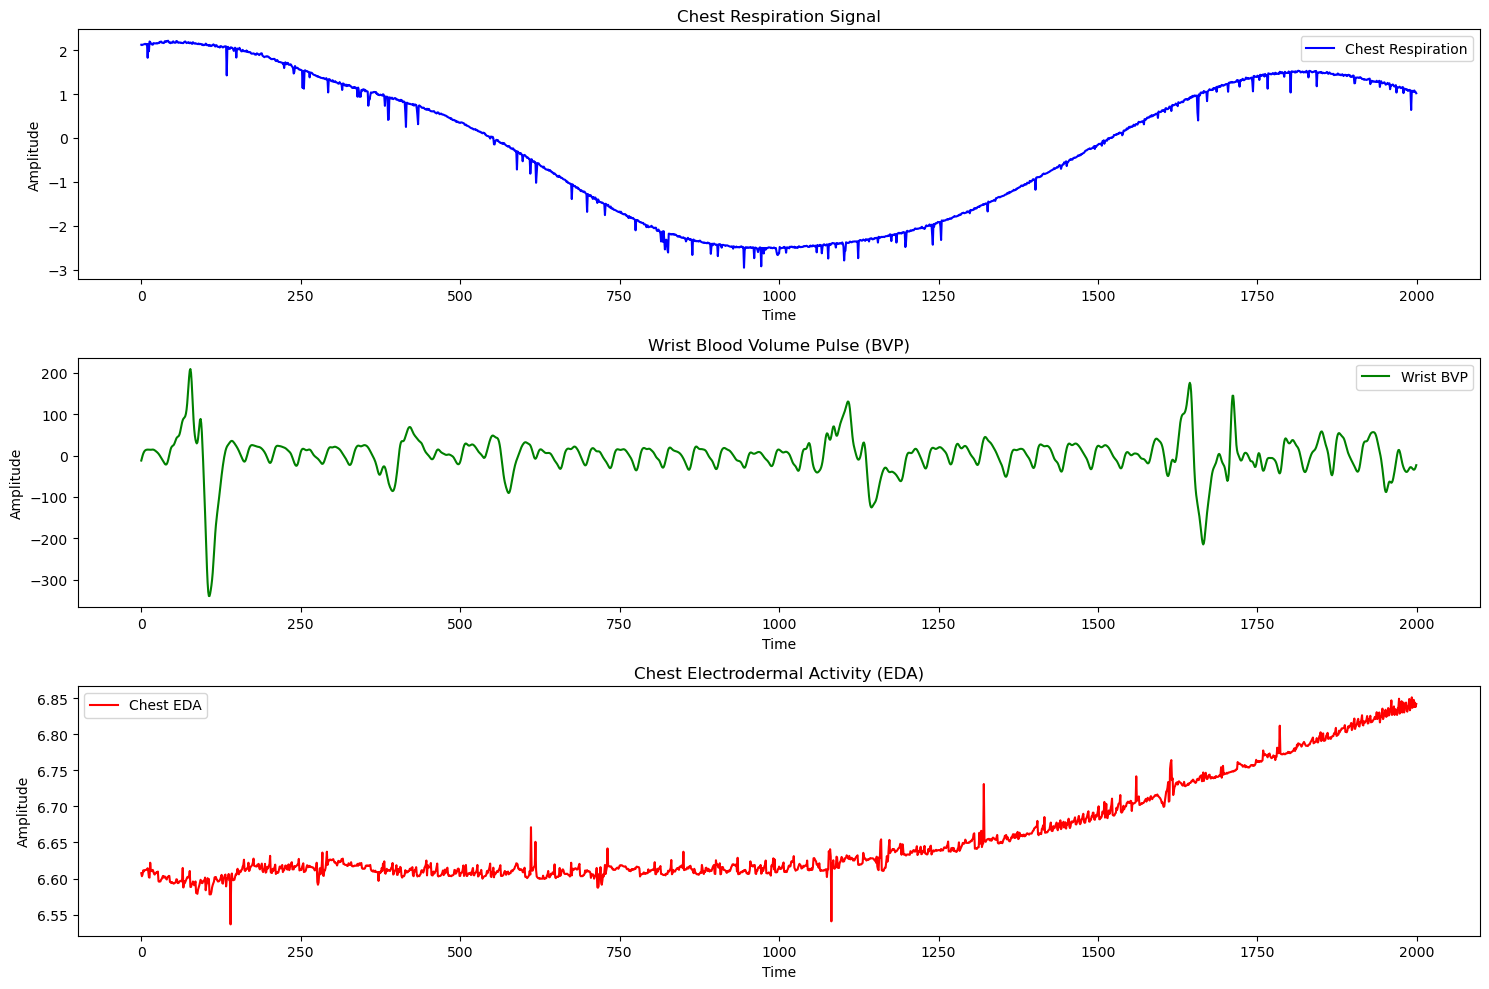

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample size for plotting (too much data otherwise)
sample_size = 2000

plt.figure(figsize=(15, 10))

# Plot Chest Respiration
plt.subplot(3, 1, 1)
plt.plot(data['signal']['chest']['Resp'][:sample_size], label="Chest Respiration", color="blue")
plt.title("Chest Respiration Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Plot Wrist Blood Volume Pulse (BVP)
plt.subplot(3, 1, 2)
plt.plot(data['signal']['wrist']['BVP'][:sample_size], label="Wrist BVP", color="green")
plt.title("Wrist Blood Volume Pulse (BVP)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Plot Chest EDA
plt.subplot(3, 1, 3)
plt.plot(data['signal']['chest']['EDA'][:sample_size], label="Chest EDA", color="red")
plt.title("Chest Electrodermal Activity (EDA)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/5c/khxv_m852n9fm5wxymw2fxk40000gn/T/ipykernel_16241/3712457098.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_labels, y=counts, palette="coolwarm")


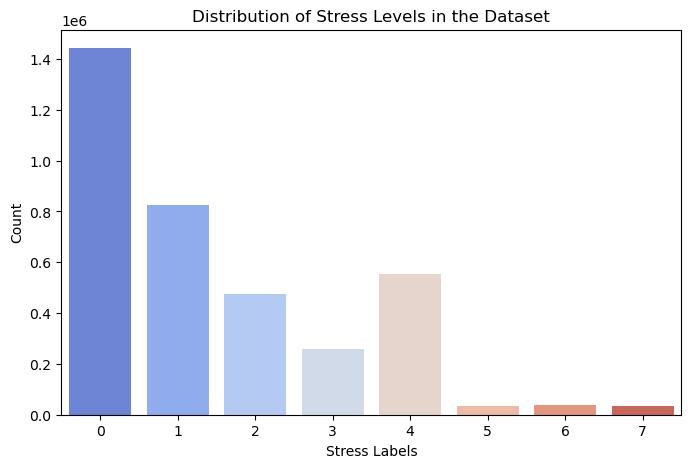

In [ ]:
import numpy as np

# count occurrences of each label
unique_labels, counts = np.unique(data['label'], return_counts=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=unique_labels, y=counts, palette="coolwarm")
plt.title("Distribution of Stress Levels in the Dataset")
plt.xlabel("Stress Labels")
plt.ylabel("Count")
plt.show()

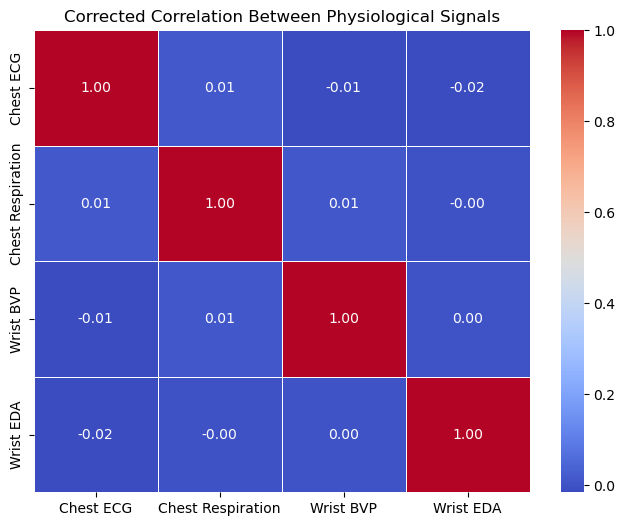

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# function to interpolate signals to the same length
def interpolate_signal(signal, target_length):
    x_original = np.linspace(0, 1, len(signal))
    x_target = np.linspace(0, 1, target_length)
    return np.interp(x_target, x_original, signal.flatten())

# find the minimum length among all signals
min_length = min(len(data['signal']['chest']['ECG']), 
                 len(data['signal']['chest']['Resp']), 
                 len(data['signal']['wrist']['BVP']), 
                 len(data['signal']['wrist']['EDA']))

# interpolate all signals
chest_ecg = interpolate_signal(data['signal']['chest']['ECG'], min_length)
chest_resp = interpolate_signal(data['signal']['chest']['Resp'], min_length)
wrist_bvp = interpolate_signal(data['signal']['wrist']['BVP'], min_length)
wrist_eda = interpolate_signal(data['signal']['wrist']['EDA'], min_length)

# convert to DataFrame
df = pd.DataFrame({
    "Chest ECG": chest_ecg,
    "Chest Respiration": chest_resp,
    "Wrist BVP": wrist_bvp,
    "Wrist EDA": wrist_eda
})

# compute correlation matrix
corr_matrix = df.corr()

# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrected Correlation Between Physiological Signals")
plt.show()

# Feature Extraction

## Heart Rate Variability (HRV)

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import scipy.signal
from sklearn.preprocessing import MinMaxScaler

# path to dataset
data_path = "/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/wesad_pickles"

# list all subject files
wesad_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith(".pkl")]

# create empty lists to store HRV features and labels
hrv_features_list = []

# define chunk size (processing in 60-second segments)
chunk_size_ecg = 60 * 700  # 60 seconds * 700 Hz
chunk_size_bvp = 60 * 64   # 60 seconds * 64 Hz

# function to calculate HRV features from RR/P-P intervals
def compute_hrv_features(rr_intervals):
    if len(rr_intervals) < 2:
        return None  # Not enough intervals to calculate HRV

    hrv_features = {
        "HRV_MeanNN": np.mean(rr_intervals),
        "HRV_SDNN": np.std(rr_intervals),
        "HRV_RMSSD": np.sqrt(np.mean(np.diff(rr_intervals) ** 2)),
        "HRV_pNN50": np.sum(np.abs(np.diff(rr_intervals)) > 50) / len(rr_intervals) * 100,
    }
    return pd.DataFrame([hrv_features])


# load and process each subject's data
for file in wesad_files:
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='latin1')

    # extract ECG and BVP signals
    chest_ecg = np.array(data['signal']['chest']['ECG']).flatten()
    wrist_bvp = np.array(data['signal']['wrist']['BVP']).flatten()
    labels = np.array(data['label'])

    # ensure lengths are consistent
    min_length = min(len(chest_ecg), len(wrist_bvp), len(labels))
    chest_ecg, wrist_bvp, labels = chest_ecg[:min_length], wrist_bvp[:min_length], labels[:min_length]

    # process data in 60s chunks
    for i in range(0, len(chest_ecg), chunk_size_ecg):
        ecg_chunk = chest_ecg[i:i + chunk_size_ecg]
        bvp_chunk = wrist_bvp[i:i + chunk_size_bvp]
        label_chunk = labels[i:i + chunk_size_ecg]

        if len(ecg_chunk) < chunk_size_ecg or len(bvp_chunk) < chunk_size_bvp:
            continue  # skip incomplete chunks

        # detect R-peaks in ECG
        r_peaks, _ = scipy.signal.find_peaks(ecg_chunk, distance=200)  # Assuming ~70 BPM
        if len(r_peaks) < 2:
            continue  # skip segment if no valid R-peaks found
        rr_intervals = np.diff(r_peaks) / 700 * 1000  # Convert to ms

        # detect P-peaks in BVP
        p_peaks, _ = scipy.signal.find_peaks(bvp_chunk, distance=30)  # Adjust for BVP
        if len(p_peaks) < 2:
            continue  # Skip segment if no valid P-peaks found
        pp_intervals = np.diff(p_peaks) / 64 * 1000

        # compute HRV features
        hrv_ecg = compute_hrv_features(rr_intervals)
        hrv_bvp = compute_hrv_features(pp_intervals)

        if hrv_ecg is None or hrv_bvp is None:
            continue  # Skip segment if HRV couldn't be computed

        # merge HRV features
        hrv_features = pd.concat([hrv_ecg, hrv_bvp], axis=1)
        hrv_features["Label"] = label_chunk[:len(hrv_features)]  # Align labels

        # append to dataset
        hrv_features_list.append(hrv_features)


# combine all valid HRV features
if len(hrv_features_list) > 0:
    hrv_dataset = pd.concat(hrv_features_list, ignore_index=True)
    hrv_dataset.to_csv("/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/hrv_dataset.csv", index=False)
    print("HRV dataset saved as 'hrv_dataset.csv'.")
else:
    print("No valid HRV data found. Check signal quality.")


HRV dataset saved as 'hrv_dataset.csv'.


In [ ]:
import pandas as pd

# load HRV dataset
hrv_dataset = pd.read_csv("/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/hrv_dataset.csv")

# display basic info
print("Dataset Shape:", hrv_dataset.shape)
print(hrv_dataset.head())

# check for missing values
print("Missing Values:", hrv_dataset.isnull().sum().sum())

Dataset Shape: (124, 9)
   HRV_MeanNN    HRV_SDNN   HRV_RMSSD  HRV_pNN50  HRV_MeanNN.1  HRV_SDNN.1  \
0  338.369653   54.109509   85.433251  57.627119    714.043675  184.905095   
1  375.220126   95.487990  163.732223  72.955975    809.503425  149.437478   
2  384.093407  112.022121  185.097878  75.000000    688.953488   96.925036   
3  394.465468  106.804866  196.184038  83.443709    741.601562  207.670648   
4  381.301183  105.064201  183.353407  80.254777    649.553571  143.899656   

   HRV_RMSSD.1  HRV_pNN50.1  Label  
0   261.581490    73.493976      0  
1   209.623285    57.534247      0  
2   146.084780    51.162791      1  
3   291.469993    78.750000      1  
4   195.440930    62.637363      1  
Missing Values: 0


In [ ]:
# load dataset
hrv_dataset = pd.read_csv("/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/hrv_dataset.csv")

# separate features & labels
X = hrv_dataset.drop(columns=["Label"]).values  # Features (HRV metrics)
y = hrv_dataset["Label"].values  # Labels (Stress levels)

y

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

## EDA Electrodermal Activity

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import scipy.signal
from sklearn.preprocessing import MinMaxScaler
import neurokit2 as nk
from scipy import integrate


data_path = "./classical-modeling/wesad_pickles"
wesad_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith(".pkl")]

# create empty lists to store HRV features and labels
eda_features_list = []

# define chunk size (processing in 60-second segments)
chunk_size_eda = 60 * 4

# function to calculate EDA features
def extract_eda_features(eda_signal, fs_eda):
    """
    Returns a one-row DataFrame with tonic/phasic EDA features:
    - Interval-related features (nSCR, mean amplitude, mean rise time, etc.)
    - Additional custom summaries (tonic/phasic means, AUCs)
    """
    # full processing pipeline: filtering, tonic/phasic decomposition, SCR detection
    eda_signals, eda_info = nk.eda_process(eda_signal, sampling_rate=fs_eda)

    # neuroKit2 interval-level summary of the entire segment
    eda_interval = nk.eda_intervalrelated(eda_signals)

    # helpful extras beyond the built-ins
    tonic = eda_signals["EDA_Tonic"].values
    phasic = eda_signals["EDA_Phasic"].values
    total = eda_signals["EDA_Clean"].values

    # AUCs (trapezoidal) — scale by sampling interval (seconds)
    dt = 1.0 / fs_eda
    auc_total = integrate.trapezoid(total, dx=dt)
    auc_tonic = integrate.trapezoid(tonic, dx=dt)
    auc_phasic = integrate.trapezoid(phasic, dx=dt)

    # peak counts (number of SCRs)
    n_scr = int(eda_interval.get("EDA_Peaks_N", [0])[0]) if "EDA_Peaks_N" in eda_interval.columns else 0

    extras = pd.DataFrame({
        "EDA_Tonic_Mean": [np.nanmean(tonic)],
        "EDA_Tonic_STD":  [np.nanstd(tonic)],
        "EDA_Phasic_Mean":[np.nanmean(phasic)],
        "EDA_Phasic_STD": [np.nanstd(phasic)],
        "EDA_Total_Mean": [np.nanmean(total)],
        "EDA_Total_STD":  [np.nanstd(total)],
        "EDA_AUC_Total":  [auc_total],
        "EDA_AUC_Tonic":  [auc_tonic],
        "EDA_AUC_Phasic": [auc_phasic],
        "EDA_nSCR":       [n_scr],
    })

    out = pd.concat([eda_interval.reset_index(drop=True), extras], axis=1)
    return out

# load and process each subject's data
for file in wesad_files:
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='latin1')

    # extract EDA signals
    wrist_eda = np.array(data['signal']['wrist']['EDA']).flatten()
    labels = np.array(data['label'])

    # ensure lengths are consistent
    min_length = min(len(chest_ecg), len(wrist_bvp), len(labels), len(wrist_eda))
    chest_ecg, wrist_bvp, labels, wrist_eda = chest_ecg[:min_length], wrist_bvp[:min_length], labels[:min_length], wrist_eda[:min_length]

    # process data in 60s chunks
    for i in range(0, len(chest_ecg), chunk_size_eda):
        eda_chunk = wrist_eda[i:i + chunk_size_eda]

        if len(eda_chunk) < chunk_size_eda:
            continue # skip incomplete chunks

        # eda stats
        eda_stats = extract_eda_features()

# Logistic Regression

Dataset shape: (124, 9)
   HRV_MeanNN    HRV_SDNN   HRV_RMSSD  HRV_pNN50  HRV_MeanNN.1  HRV_SDNN.1  \
0  338.369653   54.109509   85.433251  57.627119    714.043675  184.905095   
1  375.220126   95.487990  163.732223  72.955975    809.503425  149.437478   
2  384.093407  112.022121  185.097878  75.000000    688.953488   96.925036   
3  394.465468  106.804866  196.184038  83.443709    741.601562  207.670648   
4  381.301183  105.064201  183.353407  80.254777    649.553571  143.899656   

   HRV_RMSSD.1  HRV_pNN50.1  Label  
0   261.581490    73.493976      0  
1   209.623285    57.534247      0  
2   146.084780    51.162791      1  
3   291.469993    78.750000      1  
4   195.440930    62.637363      1  

Model Accuracy: 0.400
ROC AUC: 0.520

Confusion Matrix:
 [[10  0]
 [15  0]]


/Users/kiciazeng/opt/anaconda3/envs/neurokit_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/kiciazeng/opt/anaconda3/envs/neurokit_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


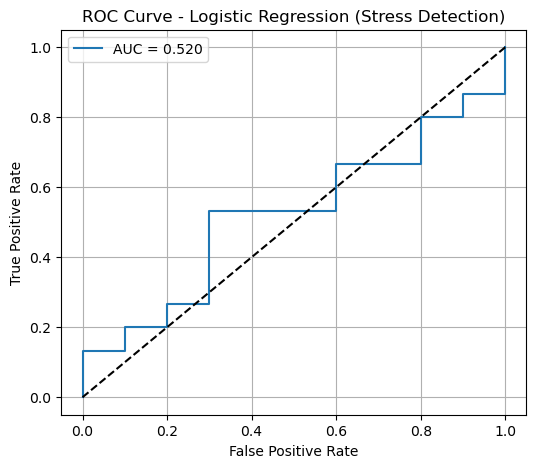

In [ ]:
# Logistic Regression on HRV dataset (stressed vs non-stressed)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/hrv_dataset.csv")
print("Dataset shape:", df.shape)
print(df.head())

# feature and labels
target_col = 'label' if 'label' in df.columns else df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# make predicitons
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

#evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Accuracy: {:.3f}".format(acc))
print("ROC AUC: {:.3f}".format(roc_auc))
print("\nConfusion Matrix:\n", cm)

# ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Stress Detection)")
plt.legend()
plt.grid(True)
plt.show()



Dataset shape: (124, 9)

=== Logistic Regression ===
Accuracy: 0.640
ROC AUC: 0.640
Confusion Matrix:
 [[ 5  5]
 [ 4 11]]

=== XGBoost ===
Accuracy: 0.720
ROC AUC: 0.760
Confusion Matrix:
 [[ 7  3]
 [ 4 11]]


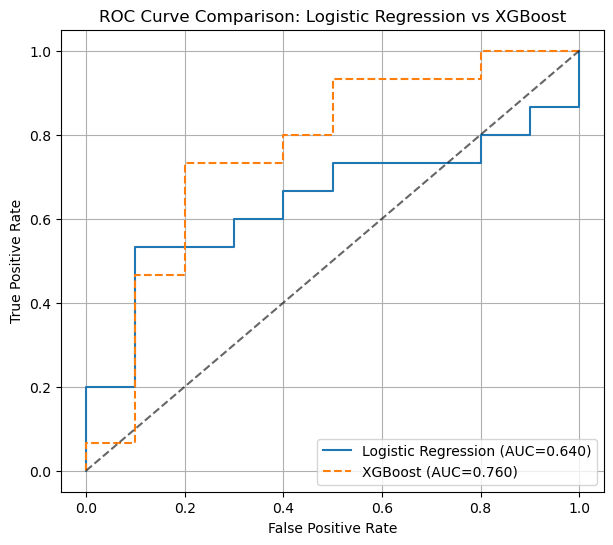

In [ ]:
# Logistic Regression vs XGBoost Comparison on HRV Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

df = pd.read_csv("/Users/kiciazeng/Desktop/MEng/MAS.S63/classical-modeling/hrv_dataset.csv")
print("Dataset shape:", df.shape)

target_col = 'label' if 'label' in df.columns else df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# train XGBoost (handles unscaled data well)
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# evaluate models
def summarize_results(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.3f}")
    print(f"ROC AUC: {auc:.3f}")
    print("Confusion Matrix:\n", cm)
    return acc, auc

acc_lr, auc_lr = summarize_results("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
acc_xgb, auc_xgb = summarize_results("XGBoost", y_test, y_pred_xgb, y_prob_xgb)

# plot ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})", linestyle='--')
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.title("ROC Curve Comparison: Logistic Regression vs XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# XGBoost

Dataset shape: (124, 9)

=== Logistic Regression ===
Accuracy : 0.640
Precision: 0.688
Recall   : 0.733
F1-score : 0.710
ROC AUC  : 0.640
Confusion Matrix:
 [[ 5  5]
 [ 4 11]]

=== XGBoost ===
Accuracy : 0.720
Precision: 0.786
Recall   : 0.733
F1-score : 0.759
ROC AUC  : 0.760
Confusion Matrix:
 [[ 7  3]
 [ 4 11]]


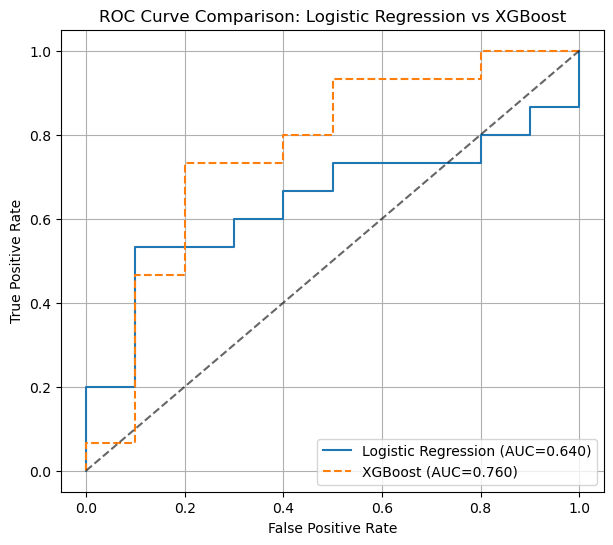

In [ ]:
# Logistic Regression vs XGBoost (with precision, recall, F1)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("./classical-modeling/hrv_dataset.csv")
print("Dataset shape:", df.shape)

target_col = 'label' if 'label' in df.columns else df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# feature scaling for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# xgboost model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# helper for evaluation
def summarize_results(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print(f"ROC AUC  : {auc:.3f}")
    print("Confusion Matrix:\n", cm)
    
    return acc, prec, rec, f1, auc

# metrics
metrics_lr = summarize_results("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
metrics_xgb = summarize_results("XGBoost", y_test, y_pred_xgb, y_prob_xgb)

# ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={metrics_lr[-1]:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={metrics_xgb[-1]:.3f})", linestyle='--')
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.title("ROC Curve Comparison: Logistic Regression vs XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
